In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

# open csv file 
filename = "train.csv"
path = os.path.abspath(filename)

try:
    train_data = pd.read_csv(path) # file need to be in the SAME FOLDER as the notebook
except FileNotFoundError:
    print("FileNotFoundError: Cannot find and open the file",filename)

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


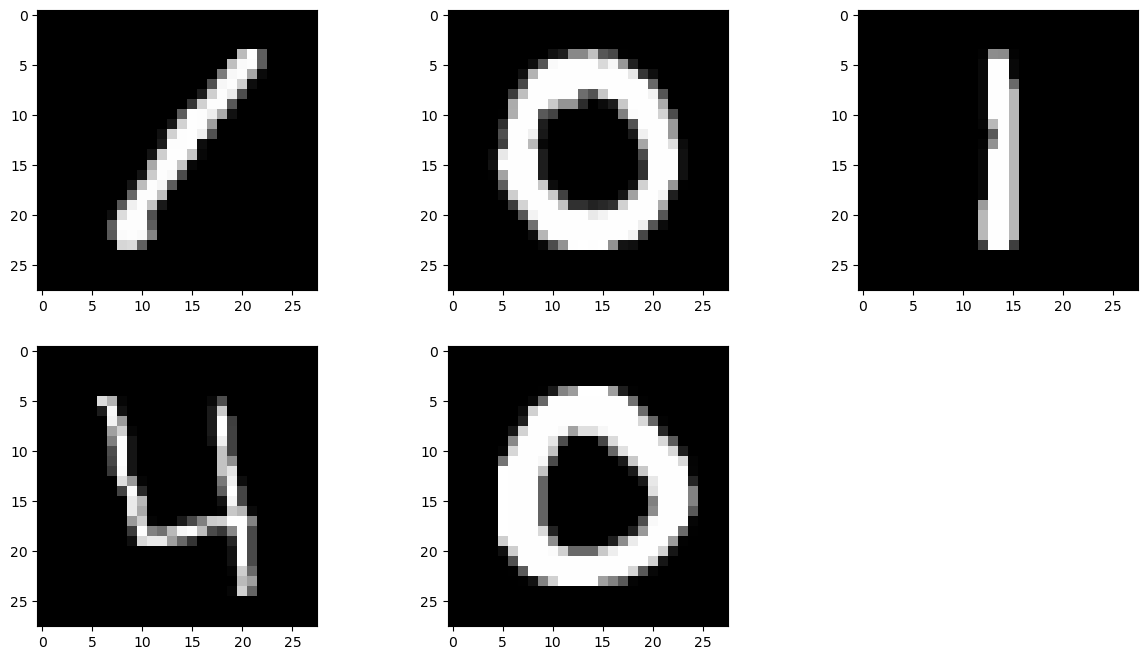

In [97]:
train_data = train_data.to_numpy() # convert DataFrame to numpy array

labels = train_data[:,0]
pixels = train_data[:,1:]

plt.figure(figsize = [15,8]) # plot first few images 
plt.set_cmap('gray')
for i in range(5):
    image = pixels[i,:].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(image)

In [98]:
# class that define each layer with its own set of weights and bias
class Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # forward method where each input is multiplied by respective weigth and add the biases
    def forward_pass(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    # back propagation of the layer calculating its new gradient weights and biases
    def back_prop(self, layer_output, gradients):
        self.dW = np.dot(layer_output.T, gradients)
        self.db = np.sum(gradients, axis=0, keepdims=True)

# ReLU activation function
def ReLU(input):
    output = np.maximum(0, input)
    return output

# Softmax activation function
def Softmax(input):
    scores = np.exp(input)
    softmax_probs = scores / np.sum(scores, axis=1, keepdims=True)
    return softmax_probs

# Regularized Cross-Entropy Loss
def Reg_CE_Loss(probabilities):
    log_targetprobs = -np.log(probabilities[range(pixels.shape[0]), labels])
    loss = np.mean(log_targetprobs)
    reg_loss = 0.5 * reg_param * (np.sum(hidden_layer1.weights * hidden_layer1.weights) + np.sum(hidden_layer2.weights * hidden_layer2.weights) + np.sum(output_layer.weights * output_layer.weights))
    total_loss = loss + reg_loss
    return total_loss

# define initial parameters
reg_param = 0.001
step_size = 0.005
epochs = 2000;

hidden_layer1 = Layer(784,16)
hidden_layer2 = Layer(16,16)
output_layer = Layer(16,10)

# training the model
for i in range(epochs):
    # forward pass 
    hidden_layer1.forward_pass(pixels)
    activation1 = ReLU(hidden_layer1.output)

    hidden_layer2.forward_pass(activation1)
    activation2 = ReLU(hidden_layer2.output)

    output_layer.forward_pass(activation2)

    probs = Softmax(output_layer.output) # softmax probabilities
    
    loss = Reg_CE_Loss(probs) # compute loss
    
    if i % 100 == 0:
        print("Iteration: %d, loss: %f" % (i, loss))
    
    # backpropagation
    # get output gradients from probabilities (derivative of softmax with respect to its inputs)
    dscores = probs
    dscores[range(pixels.shape[0]), labels] -= 1
    dscores /= pixels.shape[0]

    # calculate dW and db for output layer
    output_layer.back_prop(hidden_layer2.output, dscores)

    # backprop into hidden layer 2 (compute its gradients)
    dhidden2 = np.dot(dscores, output_layer.weights.T)
    dhidden2[hidden_layer2.output <= 0] = 0

    # calculate dW and db for hidden layer 2
    hidden_layer2.back_prop(hidden_layer1.output, dhidden2)

    # backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, hidden_layer2.weights.T)
    dhidden1[hidden_layer1.output <= 0] = 0

    # calculate dW and db for hidden layer 1
    hidden_layer1.back_prop(pixels, dhidden1)
    
    # add regularized term to gradients
    hidden_layer1.dW += reg_param * hidden_layer1.weights
    hidden_layer2.dW += reg_param * hidden_layer2.weights
    output_layer.dW += reg_param * output_layer.weights

    #update weights and biases
    hidden_layer1.weights += -step_size * hidden_layer1.dW
    hidden_layer1.biases += -step_size * hidden_layer1.db

    hidden_layer2.weights += -step_size * hidden_layer2.dW
    hidden_layer2.biases += -step_size * hidden_layer2.db

    output_layer.weights += -step_size * output_layer.dW
    output_layer.biases += -step_size * output_layer.db

# Accuracy on training set
predicted_class = np.argmax(output_layer.output, axis=1)
print("Training accuracy: %.2f" % (np.mean(predicted_class == labels)))

Iteration: 0, loss: 2.304709
Iteration: 100, loss: 1.109249
Iteration: 200, loss: 0.551626
Iteration: 300, loss: 0.411192
Iteration: 400, loss: 0.354534
Iteration: 500, loss: 0.321128
Iteration: 600, loss: 0.293967
Iteration: 700, loss: 0.274350
Iteration: 800, loss: 0.261674
Iteration: 900, loss: 0.292041
Iteration: 1000, loss: 0.240574
Iteration: 1100, loss: 0.231578
Iteration: 1200, loss: 0.226342
Iteration: 1300, loss: 0.218996
Iteration: 1400, loss: 0.214997
Iteration: 1500, loss: 0.208273
Iteration: 1600, loss: 0.213518
Iteration: 1700, loss: 0.199065
Iteration: 1800, loss: 0.193484
Iteration: 1900, loss: 0.191192
Training accuracy: 0.95


In [112]:
filename = "test.csv"
path = os.path.abspath(filename)

try:
    test_data = pd.read_csv(path)
except FileNotFoundError:
    print("FileNotFoundError: Cannot find and open the file",filename)

test_data = test_data.to_numpy()

pixels = test_data

# test the model on test data
hidden_layer1.forward_pass(pixels)
activation1 = ReLU(hidden_layer1.output)

hidden_layer2.forward_pass(activation1)
activation2 = ReLU(hidden_layer2.output)

output_layer.forward_pass(activation2)

probs = Softmax(output_layer.output)

predictions = np.argmax(probs, axis=1)

# create a DataFrame with Image index and corresponding prediction
pred_data = {
    'ImageId': range(1, (predictions.shape[0]+1)),
    'Label': predictions
}
df = pd.DataFrame(pred_data)

# write result to csv file in same folder as notebook
filename = "predictions.csv"
path = os.path.abspath(filename)
df.to_csv(path, index=False)